In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
import json
from collections import Counter

In [31]:
spec = json.load(open("test.json"))

In [32]:
rewards = np.zeros( (1, spec["max_x"], spec["max_y"]), dtype=np.float32)

In [33]:
for (x0, y0), r in spec["rewards"]:
    rewards[0, x0, y0] = r

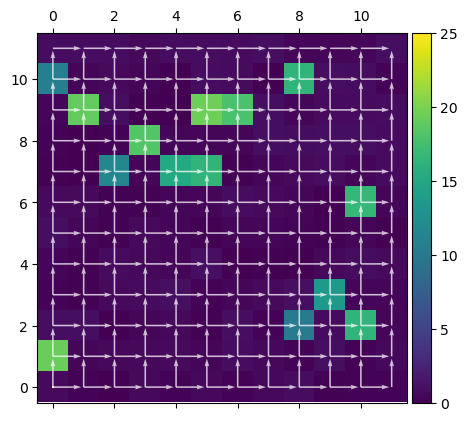

In [34]:
x = np.zeros( (1, spec["max_x"]*spec["max_y"]*2 ), dtype=np.float32)
y = np.zeros( (1, spec["max_x"]*spec["max_y"]*2 ), dtype=np.float32)
u = np.zeros( (1, spec["max_x"]*spec["max_y"]*2 ), dtype=np.float32)
v = np.zeros( (1, spec["max_x"]*spec["max_y"]*2 ), dtype=np.float32)

for x0 in range(0, spec["max_x"]):
    for y0 in range(0, spec["max_y"]):
        idx = x0 * spec["max_x"] + y0
        f = 100
        if y0 < spec["max_y"] - 1:
            x[0, idx*2] = y0
            y[0, idx*2] = x0
            u[0, idx*2] = np.log(f)
            v[0, idx*2] = 0

        if x0 < spec["max_x"] - 1:
            x[0, idx*2+1] = y0
            y[0, idx*2+1] = x0
            u[0, idx*2+1] = 0
            v[0, idx*2+1] = np.log(f)


fig, ax = plt.subplots()
im = ax.matshow(rewards[0,:,:], vmin=0, vmax=25)
ax.quiver(x[0,:], y[0,:], u[0,:], v[0,:], scale=5, units='x', pivot='tail', width=0.05, color="white", alpha=0.75)

fig.gca().invert_yaxis()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)

In [35]:
traj = json.load(open("test.1.traj"))

In [36]:
v_count = {}
c = 0
for t in traj["trajectories"]:
    v_count.setdefault(t[0], [])
    s0 = t[1][0]
    one_traj = []
    for s1 in t[1][1:]:
        one_traj.append( (s0[0], s0[1],  s1[0] - s0[0], s1[1] - s0[1]) )
        s0 = s1
    v_count[t[0]].append(one_traj)

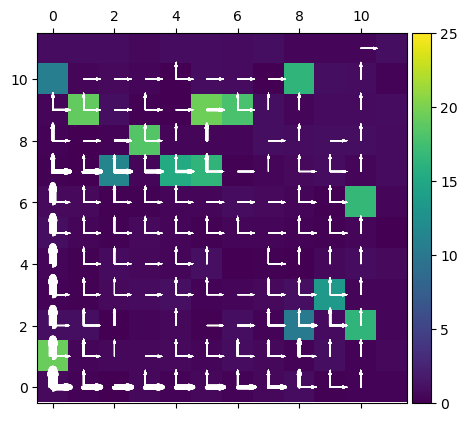

In [37]:
xx = []
yy = []
uu = []
vv = []
cc = []
v_count2 = Counter()
for i in range(200,300):
    v_count2.update(Counter(v_count[999][i]))         
    for ((x,y,u,v),c) in v_count2.items():
        xx.append(y)
        yy.append(x)
        uu.append(v)
        vv.append(u)
        cc.append(c)
cc = np.array(cc)
fig, ax = plt.subplots()
im = ax.matshow(rewards[0,:,:], vmin=0, vmax=25)

ax.quiver(xx, yy, uu, vv, pivot='tail', scale=1.8, units="x", linewidths=0.1*cc, color="white", edgecolors='w')
fig.gca().invert_yaxis()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)

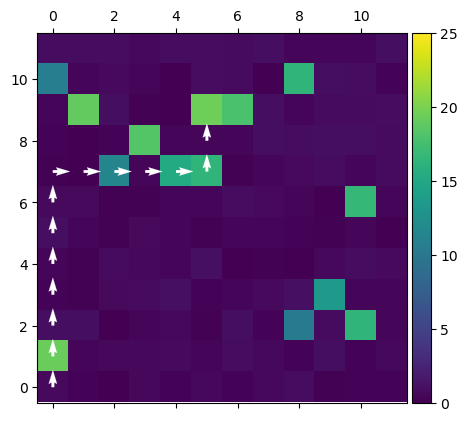

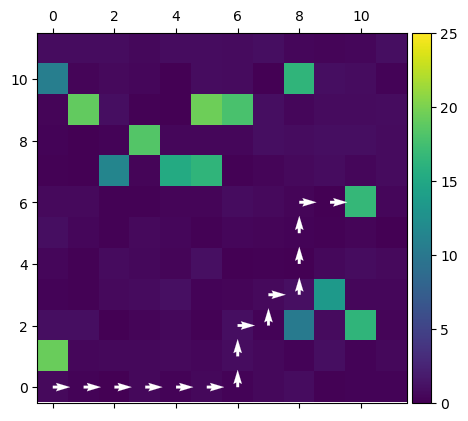

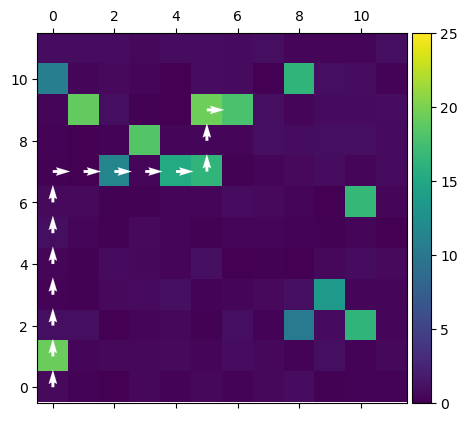

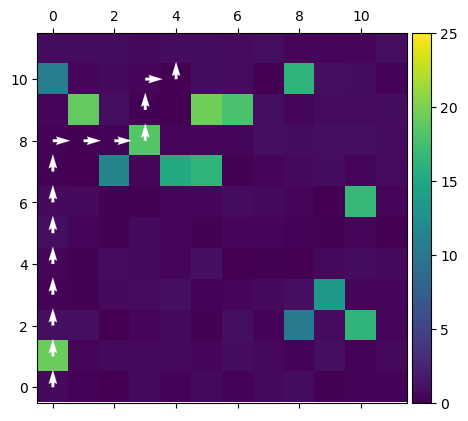

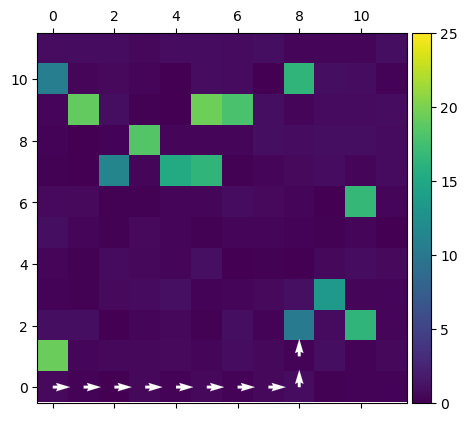

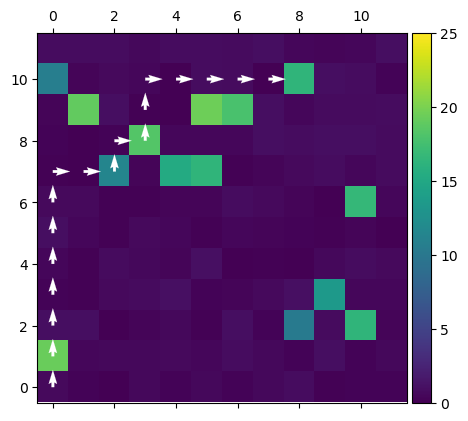

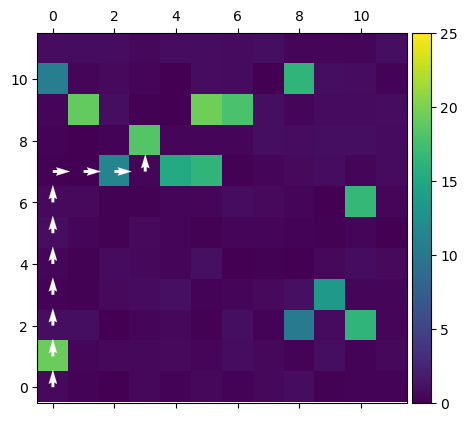

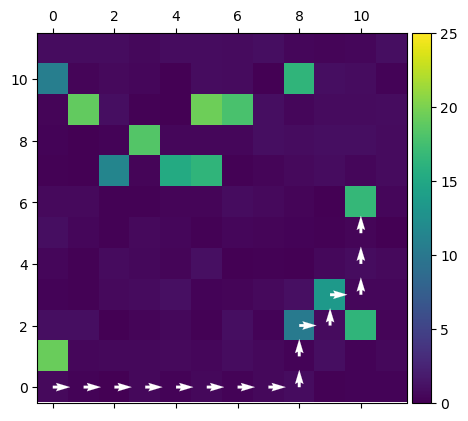

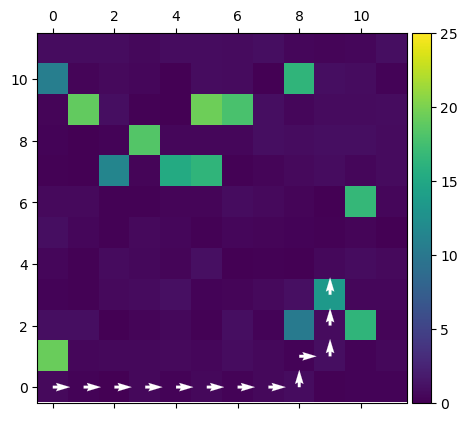

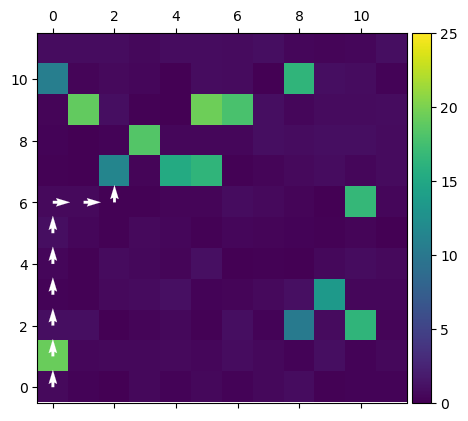

In [38]:

for i in range(200,300,10):
    xx = []
    yy = []
    uu = []
    vv = []
    cc = []
    v_count2 = Counter(v_count[999][i])         
    for ((x,y,u,v),c) in v_count2.items():
        xx.append(y)
        yy.append(x)
        uu.append(v)
        vv.append(u)
        cc.append(c)
    cc = np.array(cc)
    fig, ax = plt.subplots()
    im = ax.matshow(rewards[0,:,:], vmin=0, vmax=25)

    ax.quiver(xx, yy, uu, vv, pivot='tail', scale=1.8, units="x", linewidths=0.1*cc, color="white", edgecolors='w')
    fig.gca().invert_yaxis()
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax)

In [39]:
flow = json.load(open("test.1.flow"))

In [40]:
in_flow = np.zeros( (1200, spec["max_x"], spec["max_y"]), dtype=np.float32)
out_flow = np.zeros( (1200, spec["max_x"], spec["max_y"]), dtype=np.float32)
max_tidx = 0
x = np.zeros( (1200, spec["max_x"]*spec["max_y"]*2 ), dtype=np.float32)
y = np.zeros( (1200, spec["max_x"]*spec["max_y"]*2 ), dtype=np.float32)
u = np.zeros( (1200, spec["max_x"]*spec["max_y"]*2 ), dtype=np.float32)
v = np.zeros( (1200, spec["max_x"]*spec["max_y"]*2 ), dtype=np.float32)
f0 = flow["f0"]

for tidx, (x0, y0), (x1, y1), f in flow["flow"]:
    if tidx > max_tidx:
        max_tidx = tidx

    in_flow[tidx, x1, y1] += f
    out_flow[tidx, x0, y0] += f

for tidx, (x0, y0), (x1, y1), f in flow["flow"]:
    idx = x0 * spec["max_x"] + y0
    if y1 != y0:
        x[tidx, idx*2] = y0
        y[tidx, idx*2] = x0
        u[tidx, idx*2] = np.log(f)
        v[tidx, idx*2] = 0

    if x1 != x0:
        x[tidx, idx*2+1] = y0
        y[tidx, idx*2+1] = x0
        u[tidx, idx*2+1] = 0
        v[tidx, idx*2+1] = np.log(f)

print(max_tidx)
print(len(x), len(y), len(u), len(v))

1199
1200 1200 1200 1200


In [41]:
f0_array = np.zeros_like(in_flow)
f0_array[:, 0, 0] = np.array([_[1] for _ in f0])


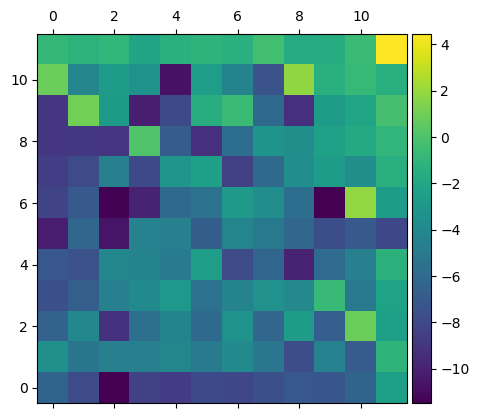

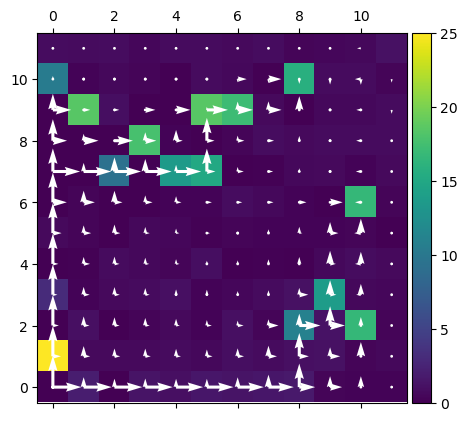

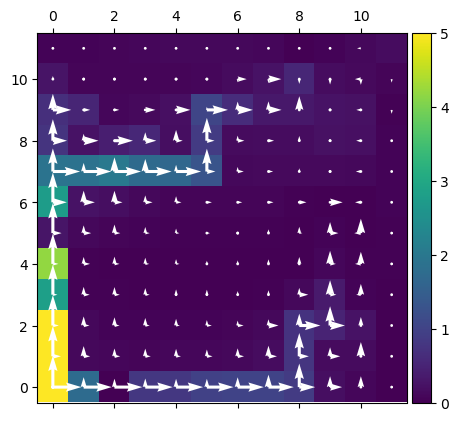

In [45]:
max_tidx=1199

diff = np.log((f0_array[max_tidx,:,:]+in_flow[max_tidx,:,:]+0.001)/(out_flow[max_tidx,:,:]+0.0001))

fig, ax = plt.subplots()
im = ax.matshow(np.log(diff*diff+0.00001))
fig.gca().invert_yaxis()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)

fig, ax = plt.subplots()
im = ax.matshow(f0_array[max_tidx,:,:]+in_flow[max_tidx,:,:]-out_flow[max_tidx,:,:], vmin=0, vmax=25)
ax.quiver(x[max_tidx,:], y[max_tidx,:], u[max_tidx,:], v[max_tidx,:], scale=5, units='x', pivot='tail', width=0.1, color="white")
fig.gca().invert_yaxis()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)


fig, ax = plt.subplots()
im = ax.matshow(abs(f0_array[max_tidx,:,:]+in_flow[max_tidx,:,:]-out_flow[max_tidx,:,:]-rewards[0,:,:]), 
            vmin=0, vmax=5)
ax.quiver(x[max_tidx,:], y[max_tidx,:], u[max_tidx,:], v[max_tidx,:], scale=5, units='x', pivot='tail', width=0.1, color="white")
fig.gca().invert_yaxis()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)


0
200
400
600
800
1000


<Figure size 640x480 with 0 Axes>

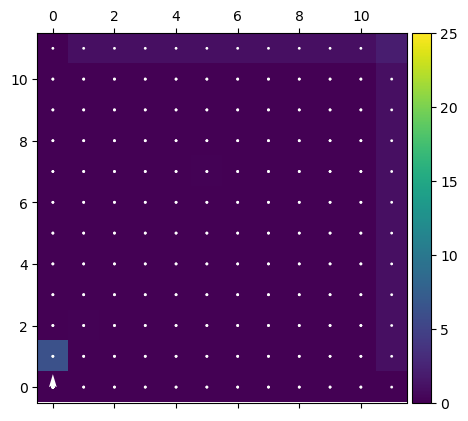

<Figure size 640x480 with 0 Axes>

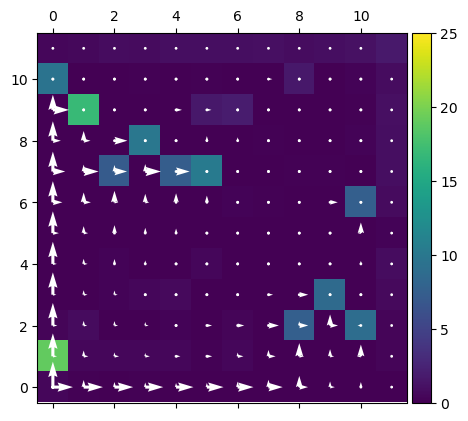

<Figure size 640x480 with 0 Axes>

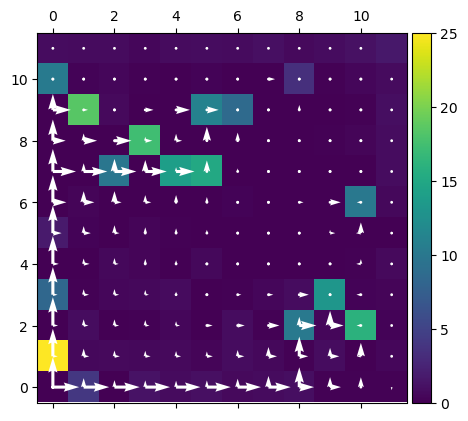

<Figure size 640x480 with 0 Axes>

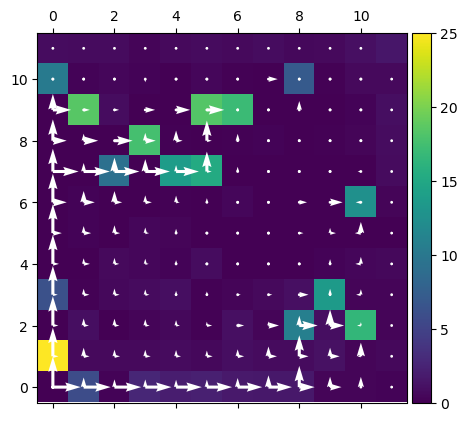

<Figure size 640x480 with 0 Axes>

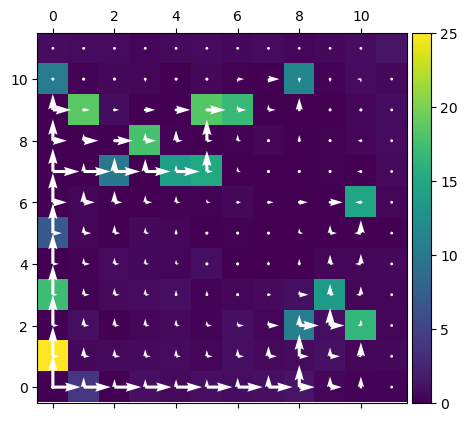

<Figure size 640x480 with 0 Axes>

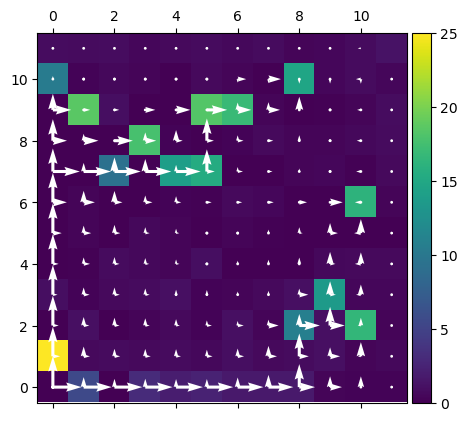

In [27]:

for idx in range(0,1001,200):
    print(idx)
    
    diff = f0_array[idx,:,:] + in_flow[idx,:,:]-out_flow[idx,:,:]-rewards[0,:,:]
    diff = (diff*diff)**0.5*5
    xx = []
    yy = [] 
    cc = [] 
    for xi in range(0, spec["max_x"]):
        for yi in range(0, spec["max_y"]):
            xx.append(xi)
            yy.append(yi)
            cc.append(diff[xi,yi])
    
    plt.figure()
    fig, ax = plt.subplots()
    im = ax.matshow(f0_array[idx,:,:]+in_flow[idx,:,:]-out_flow[idx,:,:], vmin=0, vmax=25)
    #ax.scatter(xx,yy,cc)
    ax.quiver(x[idx,:], y[idx,:], u[idx,:], v[idx,:], scale=5, units='x', pivot='tail', width=0.1, color="white")
    
    plt.gca().invert_yaxis()
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax)